#Data Cleansing a Government Health Expenditure Dataset by Dr Alvin Ang

https://www.alvinang.sg/s/government-health-expenditure.csv



---



#Step 1: Import the Data

In [2]:
import pandas as pd

health = pd.read_csv('https://www.alvinang.sg/s/government-health-expenditure.csv') 

health

,financial_year,operating_expenditure,development_expenditure,government_health_expenditure,percentage_gdp
0,2006,1840,96,2009.7,0.9
1,2007,2019,185,2283.2,0.8
2,2008,2379,336,2814.1,1.0
3,2009,2920,711,3745.8,1.3
4,2010,3258,485,3856.7,1.2
5,2011,3489,453,4091.5,1.2
6,2012,4066,605,4837.3,1.3
7,2013,5044,723,5938.1,1.6
8,2014,5872,1147,7223.1,1.8
9,2015,7520,1413,8639.9,2.1




---



#Step 2: Slice out Financial Year / Operating / Development / Government Expenditure Columns

In [4]:
health_sample = pd.read_csv('https://www.alvinang.sg/s/government-health-expenditure.csv',
                            index_col='financial_year',
                            usecols=['financial_year',
                                     'operating_expenditure',
                                     'development_expenditure',
                                     'government_health_expenditure'])
health_sample

,operating_expenditure,development_expenditure,government_health_expenditure
financial_year,,,
2006,1840,96,2009.7
2007,2019,185,2283.2
2008,2379,336,2814.1
2009,2920,711,3745.8
2010,3258,485,3856.7
2011,3489,453,4091.5
2012,4066,605,4837.3
2013,5044,723,5938.1
2014,5872,1147,7223.1




---



#Step 3: Export to CSV

In [ ]:
health_sample.to_csv('Heath_Expenditure.csv')



---



In [5]:
health_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2006 to 2017
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   operating_expenditure          12 non-null     int64  
 1   development_expenditure        12 non-null     int64  
 2   government_health_expenditure  12 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 384.0 bytes




---



#Step 4: Slice out only Operating + Developement Expenditure Columns

In [6]:
a = health_sample[['operating_expenditure','development_expenditure']]
a

,operating_expenditure,development_expenditure
financial_year,,
2006,1840,96
2007,2019,185
2008,2379,336
2009,2920,711
2010,3258,485
2011,3489,453
2012,4066,605
2013,5044,723
2014,5872,1147




---



#Step 5: Slice Out Year 2016 + 2017 (Operating + Development Expenditure)

In [9]:
b = health_sample[['operating_expenditure','development_expenditure']].loc[[2016,2017]]
b

,operating_expenditure,development_expenditure
financial_year,,
2016,8199,1618
2017,8734,1465




---



#Step 6: Slice out Rows 3 to 7

In [10]:
c = health_sample[['operating_expenditure','development_expenditure']].iloc[3:8]
c

,operating_expenditure,development_expenditure
financial_year,,
2009,2920,711
2010,3258,485
2011,3489,453
2012,4066,605
2013,5044,723




---



#Step 7: Slice out Operating Expenditure > 5000 

In [12]:
d = health_sample[health_sample.operating_expenditure>5000]
d

,operating_expenditure,development_expenditure,government_health_expenditure
financial_year,,,
2013,5044,723,5938.1
2014,5872,1147,7223.1
2015,7520,1413,8639.9
2016,8199,1618,9307.0
2017,8734,1465,9764.3




---



#Step 8: Slice Out Between 5000 < Operating Expenditure < 8000

In [15]:
e = health_sample[(health_sample.operating_expenditure>5000) 
                & (health_sample.operating_expenditure<8000) ]

e

,operating_expenditure,development_expenditure,government_health_expenditure
financial_year,,,
2013,5044,723,5938.1
2014,5872,1147,7223.1
2015,7520,1413,8639.9




---



#Step 9: Plot Expenditure Over the Years

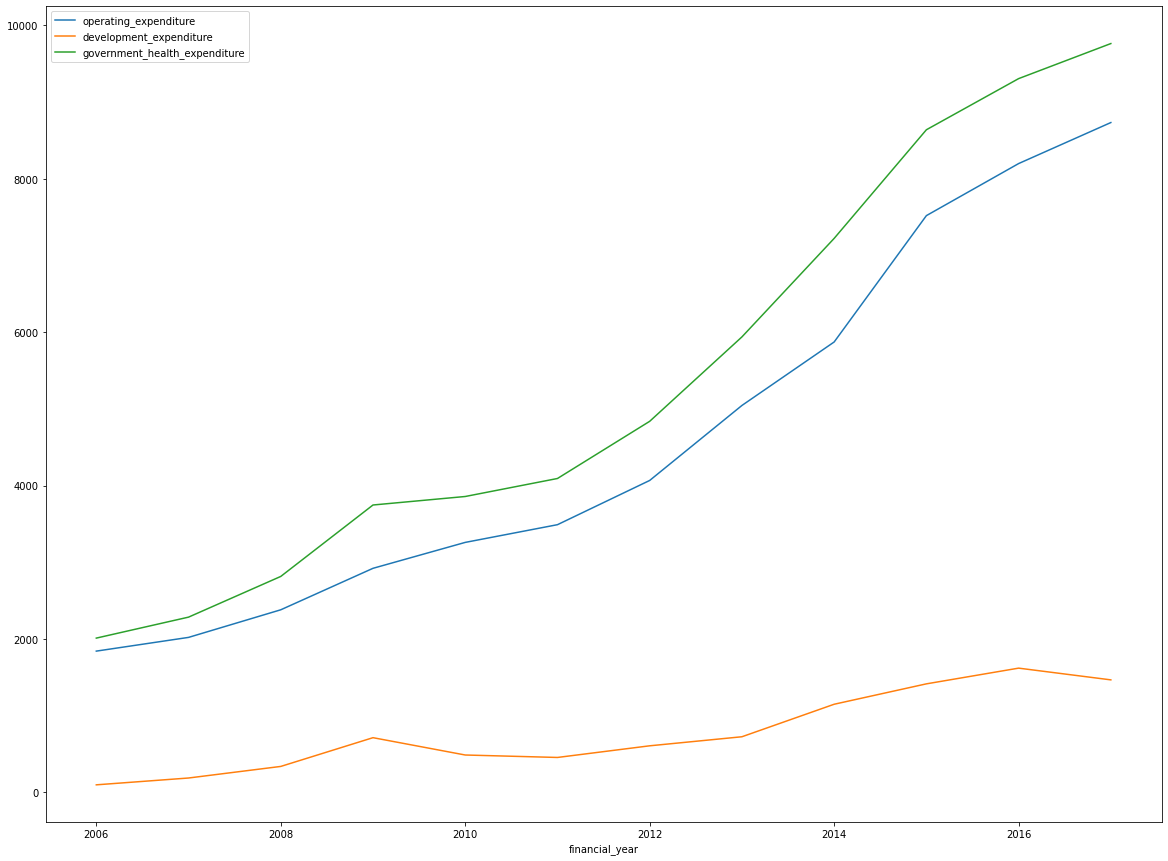

In [17]:
health_sample.plot(figsize = (20, 15))



---



#Step 10: 3 Sub Plots for Expenditures

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faed0b40c50>,
      dtype=object)

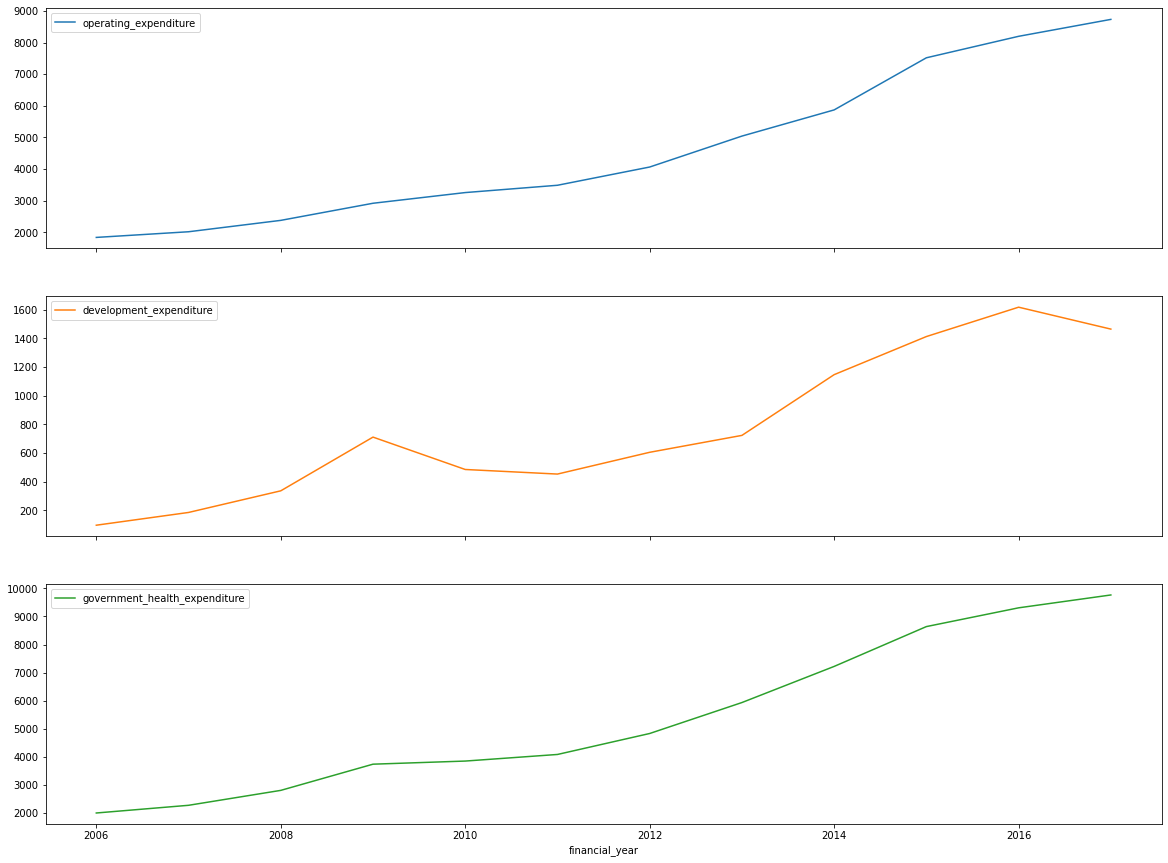

In [19]:
health_sample.plot(subplots=True, figsize = (20, 15))



---



#Step 11: Apply a SGD to USD Function

##11a. Create the SGD to USD Function

In [20]:
SGD2USD = lambda x: x/1.4

##11b. Apply the SGD to USD Function onto the Dataset

In [22]:
health[['operating_expenditure','development_expenditure','government_health_expenditure']].apply(SGD2USD)

#we select only 3 columns to apply: Operating / Development / Government

,operating_expenditure,development_expenditure,government_health_expenditure
0,1314.285714,68.571429,1435.500000
1,1442.142857,132.142857,1630.857143
2,1699.285714,240.000000,2010.071429
3,2085.714286,507.857143,2675.571429
4,2327.142857,346.428571,2754.785714
5,2492.142857,323.571429,2922.500000
6,2904.285714,432.142857,3455.214286
7,3602.857143,516.428571,4241.500000
8,4194.285714,819.285714,5159.357143
9,5371.428571,1009.285714,6171.357143




---



#Step 12: Linear Regression - Regressing Operating Expenditure to Government Expenditure

In [26]:
x = health_sample[['operating_expenditure','government_health_expenditure']]
x

,operating_expenditure,government_health_expenditure
financial_year,,
2006,1840,2009.7
2007,2019,2283.2
2008,2379,2814.1
2009,2920,3745.8
2010,3258,3856.7
2011,3489,4091.5
2012,4066,4837.3
2013,5044,5938.1
2014,5872,7223.1


In [27]:
y = x.pop('government_health_expenditure')
y

# x ~ Operating Expenditure
# y ~ Government Health Expenditure

financial_year
2006    2009.7
2007    2283.2
2008    2814.1
2009    3745.8
2010    3856.7
2011    4091.5
2012    4837.3
2013    5938.1
2014    7223.1
2015    8639.9
2016    9307.0
2017    9764.3
Name: government_health_expenditure, dtype: float64

In [28]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [29]:
lm.fit(x,y)
yhat = lm.predict(x)

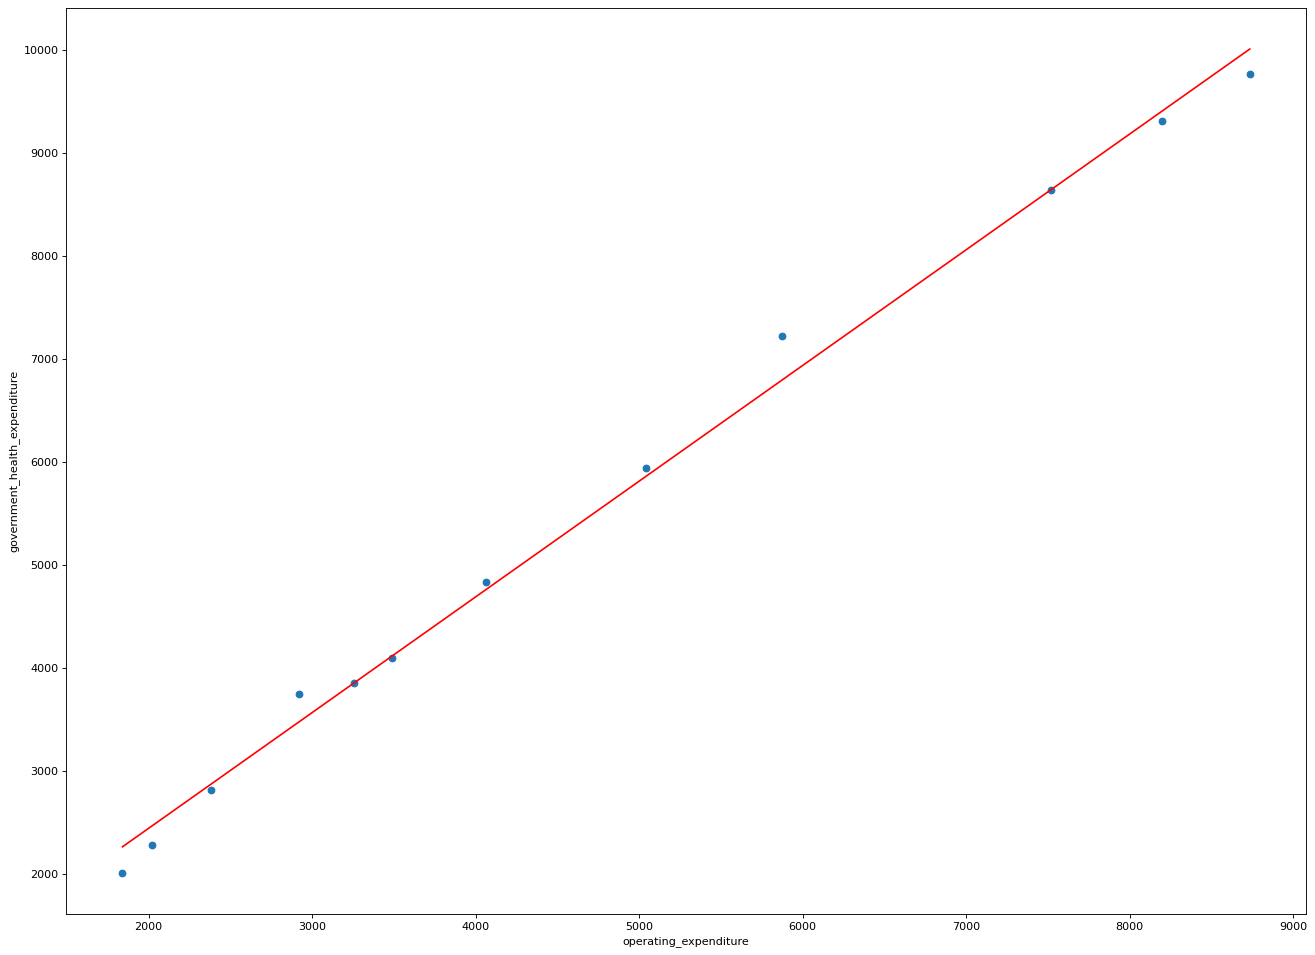

In [39]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 15), dpi=80)
plt.scatter(x,y)
plt.xlabel('operating_expenditure')
plt.ylabel('government_health_expenditure')
plt.plot(x,yhat,'r')
plt.show()

#as Operating Expenditure increases, Government Expenditure increases linearly
#together with it



---



#THE END 


---

